# Bayes Theorem

# => Naive Bayes Classifier : Mushroom Dataset
    -> Goal is to predict the class of mushrooms, given some features of the mushrooms. We will use Naive Bayes Model for 
       this classification

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
# Load the Dataset
df = pd.read_csv('./mushrooms.csv')
print(df.shape)
df.head()

(8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Encode the Categorical data into Numerical data

In [3]:
le = LabelEncoder()
# Applies tramsformation on each columns
ds = df.apply(le.fit_transform)


In [4]:
ds.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [5]:
data = ds.values # convertin pandas dataframe into numpy array
print(data.shape)
print(type(data))

print(data[:5,:])

data_x = data[:,1:]
data_y = data[:,0]

(8124, 23)
<class 'numpy.ndarray'>
[[1 5 2 4 1 6 1 0 1 4 0 3 2 2 7 7 0 2 1 4 2 3 5]
 [0 5 2 9 1 0 1 0 0 4 0 2 2 2 7 7 0 2 1 4 3 2 1]
 [0 0 2 8 1 3 1 0 0 5 0 2 2 2 7 7 0 2 1 4 3 2 3]
 [1 5 3 8 1 6 1 0 1 5 0 3 2 2 7 7 0 2 1 4 2 3 5]
 [0 5 2 3 0 5 1 1 0 4 1 3 2 2 7 7 0 2 1 0 3 0 1]]


# Break the Data into train test

In [6]:
x_train,x_test,y_train,y_test = train_test_split(data_x,data_y,test_size=0.2)

In [7]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(6499, 22) (6499,)
(1625, 22) (1625,)


In [8]:
np.unique(y_test)

array([0, 1])

In [9]:
# Inverse mapping :- do yourself 

# Building Our Classifier!

In [10]:
def prior_prob(y_train,label):
    
    total_examples = y_train.shape[0]
    class_examples = np.sum(y_train == label)
    
    return (class_examples)/float(total_examples)
    

In [11]:
#y = np.array([0,5,5,1,1,1,0,1,0,0])

#prior_prob(y,1)

In [12]:
def cond_prob(x_train,y_trian,feature_col,feature_val,label):
    
    x_filtered = x_train[y_train==label]
    numerator = np.sum(x_filtered[:,feature_col]==feature_val)
    denominator = np.sum(y_train==label)
    
    return numerator/float(denominator)

In [13]:
np.unique(y_train)

array([0, 1])

In [14]:
def predict(x_train,y_train,xtest):
    """" Xtest is a single testing point, n features """
    
    classes = np.unique(y_train)
    n_features = x_train.shape[1]
    post_probs = []
    # Compute Posterior for each class
    for label in classes:
        
        # Post_c = likelihood*prior
        likelihood = 1.0
        for f in range(n_features):
            cond = cond_prob(x_train,y_train,f,xtest[f],label)
            likelihood*=cond
        
        prior = prior_prob(y_train,label)
        post = likelihood*prior
        post_probs.append(post)
        
    pred = np.argmax(post_probs)
    return pred
    

In [15]:
output = predict(x_train,y_train,x_test[1])
print(output)
print(y_test[1])

1
1


In [16]:
def score(x_train,y_train,x_test,y_test):
    
    pred = []
    
    for i in range(x_test.shape[0]):
        pred_label = predict(x_train,y_train,x_test[i])
        pred.append(pred_label)
        
    pred = np.array(pred)
    
    accuracy = np.sum(pred==y_test)/y_test.shape[0]
    return accuracy

In [17]:
print(score(x_train,y_train,x_test,y_test))

0.9981538461538462


# Gausian Naive Bayes using sklearn

In [45]:
from sklearn.naive_bayes import GaussianNB

In [46]:
gnb =GaussianNB()

In [47]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [48]:
X,Y = make_classification(n_samples=200,n_features=2,n_informative=2,n_redundant=0,random_state=4)
# random_state parameter is passed such that dataset doesn't vary each time as it produced randomised data

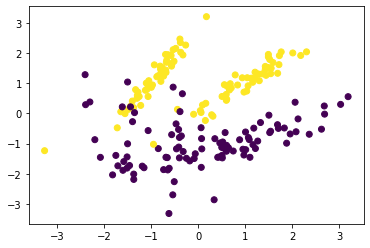

In [49]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [50]:
print(X[0])
print(X.shape) # continues value feature

[-1.36748138 -2.18619146]
(200, 2)


In [51]:
# Train our classifier
gnb.fit(X,Y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [52]:
gnb.score(X,Y) # accuracy

0.9

In [53]:
ypred = gnb.predict(X)
print(ypred)

[0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0
 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1
 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0
 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1
 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0
 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1]


In [54]:
print(Y)

[0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1
 1 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0
 1 1 0 1 0 0 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1
 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0
 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1]


In [55]:
acc = (np.sum(ypred==Y))/X.shape[0]
print(acc)

0.9


#  ConFusion Matrix

In [56]:
# precision = (tp)/(tp+fp)
# recall = (tp)/(tp+fn)
# F-measure = (2*tp)/(2*tp+fp+fn) ;jarmonic mean of precision and recall

In [60]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


### Generate Confusion Matrix

In [30]:
from sklearn.metrics import confusion_matrix

In [57]:
cnf_matrix = confusion_matrix(Y,ypred)
print(cnf_matrix)

[[87 11]
 [ 9 93]]


### Visualize ConFusion matrix

Confusion matrix, without normalization
[[87 11]
 [ 9 93]]


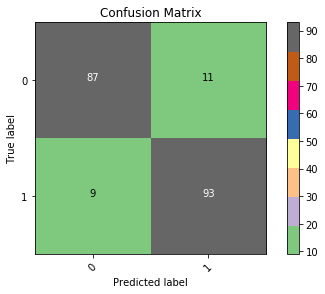

In [64]:
plot_confusion_matrix(cnf_matrix,[0,1],normalize=False,title="Confusion Matrix",cmap = plt.cm.Accent)

# MNISst Classification : Multinomial vs Gaussian Naive Bayes

In [32]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Dataset Preparation

In [65]:
# Load the Sklearn MNIST Dataset
digits = load_digits()

In [66]:
X = digits.data
Y = digits.target

In [67]:
print(X.shape,Y.shape)

(1797, 64) (1797,)


0


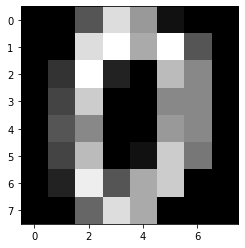

In [68]:
plt.imshow(X[0].reshape((8,8)),cmap="gray")
print(Y[0])

In [69]:
print(X[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [70]:
# Train Models
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [71]:
mnb = MultinomialNB()
gnb = GaussianNB()

In [72]:
# Train
mnb.fit(X,Y)
gnb.fit(X,Y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [73]:
print(mnb.score(X,Y))
print(gnb.score(X,Y))

0.9053978853644964
0.8580968280467446


In [74]:
cross_val_score(gnb,X,Y,scoring="accuracy",cv=10).mean()

0.8113904407200497

In [75]:
cross_val_score(mnb,X,Y,scoring="accuracy",cv=10).mean()

0.8797858472998138

# Multinomial Naive Bayes is giving better result.
# This is because each feature is discrete valued ! 

# Constructing and visualising confusion Matrix

In [79]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [81]:
classes_labels = np.arange(10)
print(classes_labels)

Confusion matrix, without normalization
[[175   0   0   0   3   0   0   0   0   0]
 [  0 137  14   0   0   1   2   0  13  15]
 [  0   7 160   0   0   0   0   0   8   2]
 [  0   0   2 159   0   2   0   5   8   7]
 [  1   0   0   0 173   0   0   4   3   0]
 [  0   0   0   0   1 157   1   1   2  20]
 [  0   2   0   0   1   1 176   0   1   0]
 [  0   0   0   0   0   0   0 178   1   0]
 [  0  11   1   0   1   0   1   1 154   5]
 [  0   1   0   1   1   1   0  11   7 158]]


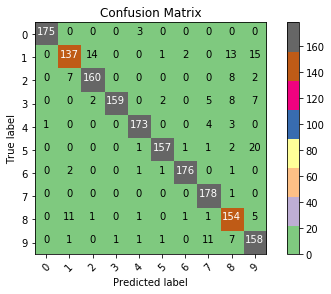

In [85]:
from sklearn.metrics import confusion_matrix
Y_mnb = mnb.predict(X)
cnf_matrix = confusion_matrix(Y,Y_mnb)
#print(cnf_matrix)

plot_confusion_matrix(cnf_matrix,classes=classes_labels,normalize=False,title='Confusion Matrix',cmap=plt.cm.Accent)

In [80]:
# Note - Diagonal Entris represents No of elements where Predicted Class = Actual Class

Confusion matrix, without normalization
[[176   0   0   0   1   0   0   1   0   0]
 [  0 154   0   0   0   0   3   5  14   6]
 [  0  13 113   0   0   1   1   0  49   0]
 [  0   2   2 145   0   6   0   7  20   1]
 [  1   1   0   0 152   1   2  21   3   0]
 [  0   0   0   3   0 169   1   6   2   1]
 [  0   1   0   0   0   1 179   0   0   0]
 [  0   0   0   0   1   1   0 177   0   0]
 [  0   8   0   1   0   3   0  12 150   0]
 [  1   6   0   5   1   3   0  17  20 127]]


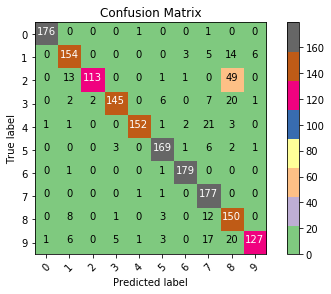

In [86]:
# For Gaussian Naive Bayes
Y_gnb = gnb.predict(X)
cnf_matrix = confusion_matrix(Y,Y_gnb)
#print(cnf_matrix)

plot_confusion_matrix(cnf_matrix,classes=classes_labels,normalize=False,title='Confusion Matrix',cmap=plt.cm.Accent)

In [ ]:
# Calculate Accuracy,Precision,Recall,F-measure for each confusion matrices

# Accuracy = (tp+tn)/(total examples)
# Precision = (tp)/(tp+fp)
# Recall = (tp)/(tp+fn)
# F-measure = (2*tp)/(2*tp+fp+fn) ; Harmonic mean of Precision and Recall

tp = true positive
fp = false positive
tn = true negative
fn = false negative